<a href="https://colab.research.google.com/github/sushmalagusani/Handwritten_digit_recognition/blob/main/final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
mnist = tf.keras.datasets.mnist #28*28 image of handwritten of 0-9 
(x_train, y_train),(x_test,y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))


Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


In [4]:
print("Sample Training Data is {}".format(x_train[0]))

Sample Training Data is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [5]:
print("Sample Training label is {}".format(y_train[0:5]))


Sample Training label is [5 0 4 1 9]


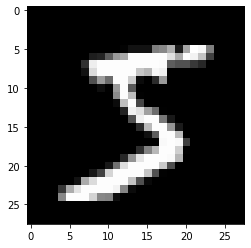

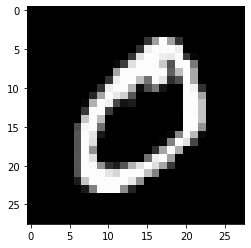

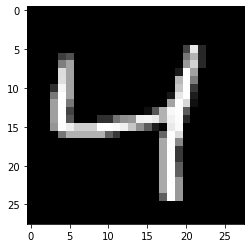

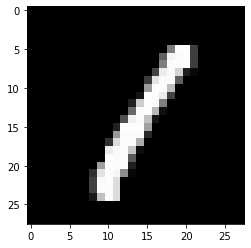

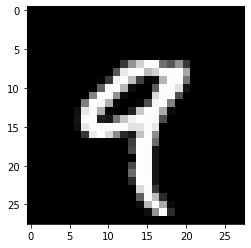

In [6]:
for i in range(0,5):
  plt.imshow(x_train[i],cmap='gray')
  plt.show()


In [7]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)


In [8]:
print("Training Data after normalizing is {}".format(x_train[0]))
print("Testing  Data after normalizing is {}".format(x_test[0]))


Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 40 )


Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2658 - accuracy: 0.9229
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1038 - accuracy: 0.9680
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0741 - accuracy: 0.9761
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9836
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0410 - accuracy: 0.9863
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0330 - accuracy: 0.9888
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0257 - accuracy: 0.9916
Epoch 8/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0208 - accuracy: 0.9930
Epoch 9/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0187 - accuracy: 0.9932
Epoch 10/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)


313/313 [==============================] - 1s 1ms/step - loss: 0.1896 - accuracy: 0.9775
0.18960392475128174 0.9775000214576721


In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


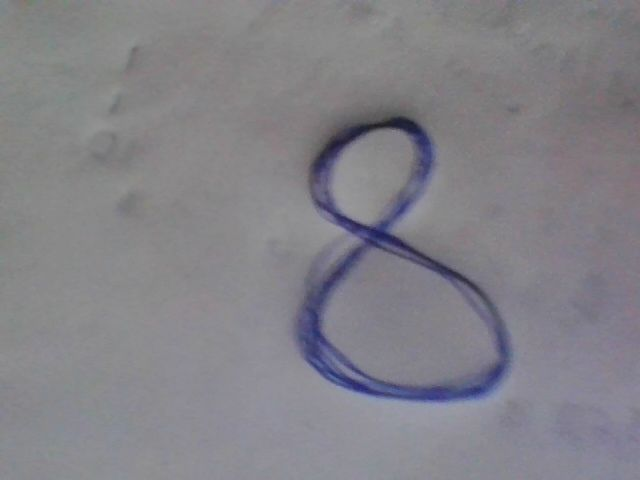

In [12]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


307200


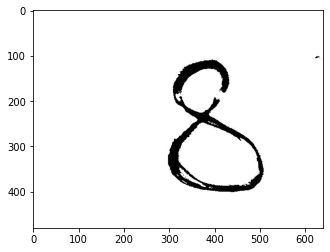

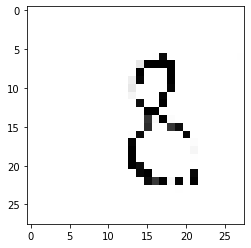

Probability Distribution for 0 1.2498323e-22
Probability Distribution for 1 0.9985991
Probability Distribution for 2 8.52079e-12
Probability Distribution for 3 2.1939764e-14
Probability Distribution for 4 3.988598e-08
Probability Distribution for 5 3.426522e-24
Probability Distribution for 6 7.655845e-18
Probability Distribution for 7 0.0014009399
Probability Distribution for 8 4.943825e-14
Probability Distribution for 9 2.8313862e-10
The Predicted Value is 1


In [13]:
from PIL import Image
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
#K.set_image_dim_ordering('th')
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict(np.array([[user_test]]))
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))
